In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker


In [3]:
df_compras = pd.read_csv('compras_2019.csv')
df_compras

,PROV,BENEFICIARIO,RFC,FACT-NUE-FO,CONTRATO,CONCEPTO,TIPO_OP,FDO-#OP,FECHA,TOTAL_EGRESO,Hoja,Mes
0,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,155002-1,NO APLICA,REINTEGRO DE PRODUCTOS FINANCIEROS DEL PROGRAM...,TR,260000021.0,2019-01-23,22455.00,CONTRATISTAS Y FDO FED,ENERO
1,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,155002-2,NO APLICA,REINTEGRO DE IMPORTE NO COMPROMETIDO AL 31 DE ...,TR,260000022.0,2019-01-23,22000000.00,CONTRATISTAS Y FDO FED,ENERO
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,158002-2,NO APLICA,REINTEGRO VIA PEC DE RENDIMIENTOS Y PRODUCTOS ...,TR,262000019.0,2019-01-25,57957.14,CONTRATISTAS Y FDO FED,ENERO
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,158002-1,NO APLICA,REINTEGRO DE RECURSOS NO DEVENGADOS DEL PROGRA...,TR,262000020.0,2019-01-25,66692.24,CONTRATISTAS Y FDO FED,ENERO
4,112917,"TELEFONOS DE MEXICO,S.A.B DE C.V.",TME840315KT6,0F0359812-158003-13,NO APLICA,CONSUMO DE TELEFONO DEL DIF CANOAS Y SEGURIDAD...,CH,1100331.0,2019-01-24,3048.07,GASTOS VARIOS,ENERO
...,...,...,...,...,...,...,...,...,...,...,...,...
20697,203016,TAMEZ VALLE SERGIO DAVID,TAVS630131FH8,347-158004-1869,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. R...,CH,1102565.0,2019-12-17,89042.85,SERV. PERS.,DICIEMBRE
20698,203016,VALLEJO NORIEGA JOSEFA TERESA,VANJ671015494,1466-158004-1882,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. RE...,CH,1102587.0,2019-12-17,86650.55,SERV. PERS.,DICIEMBRE
20699,203016,VALLEJO NORIEGA MARIA SUSANA,VANS510415R35,1466-158004-1881,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. RE...,CH,1102566.0,2019-12-17,86650.55,SERV. PERS.,DICIEMBRE
20700,203016,VARELA MONSIVAIS ANTONIA,VAMA4206165Z7,7947-158004-1867,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. MA...,CH,1102567.0,2019-12-17,176451.54,SERV. PERS.,DICIEMBRE


# vision de dataset

In [5]:
df_compras.columns

Index(['PROV', 'BENEFICIARIO', 'RFC', 'FACT-NUE-FO', 'CONTRATO', 'CONCEPTO',
       'TIPO_OP', 'FDO-#OP', 'FECHA', 'TOTAL_EGRESO', 'Hoja', 'Mes'],
      dtype='object')

In [6]:
df_compras.dtypes

PROV              int64
BENEFICIARIO     object
RFC              object
FACT-NUE-FO      object
CONTRATO         object
CONCEPTO         object
TIPO_OP          object
FDO-#OP         float64
FECHA            object
TOTAL_EGRESO    float64
Hoja             object
Mes              object
dtype: object

In [7]:
df_compras.describe()

,PROV,FDO-#OP,TOTAL_EGRESO
count,20702.000000,2.070200e+04,2.070200e+04
mean,183148.025312,1.593406e+08,2.981334e+05
std,84955.632724,1.386894e+08,1.878623e+06
min,110036.000000,1.013685e+06,4.600000e-01
25%,115826.000000,1.015696e+06,2.900000e+03
50%,118313.000000,2.600001e+08,1.252800e+04
75%,309107.000000,2.850008e+08,6.343708e+04
max,326853.000000,6.040000e+08,8.426977e+07


In [8]:
df_filter=df_compras[['BENEFICIARIO','FACT-NUE-FO','CONTRATO','CONCEPTO','TIPO_OP','FECHA','TOTAL_EGRESO','Hoja','Mes']]
df_filter

,BENEFICIARIO,FACT-NUE-FO,CONTRATO,CONCEPTO,TIPO_OP,FECHA,TOTAL_EGRESO,Hoja,Mes
0,TESORERIA DE LA FEDERACION,155002-1,NO APLICA,REINTEGRO DE PRODUCTOS FINANCIEROS DEL PROGRAM...,TR,2019-01-23,22455.00,CONTRATISTAS Y FDO FED,ENERO
1,TESORERIA DE LA FEDERACION,155002-2,NO APLICA,REINTEGRO DE IMPORTE NO COMPROMETIDO AL 31 DE ...,TR,2019-01-23,22000000.00,CONTRATISTAS Y FDO FED,ENERO
2,TESORERIA DE LA FEDERACION,158002-2,NO APLICA,REINTEGRO VIA PEC DE RENDIMIENTOS Y PRODUCTOS ...,TR,2019-01-25,57957.14,CONTRATISTAS Y FDO FED,ENERO
3,TESORERIA DE LA FEDERACION,158002-1,NO APLICA,REINTEGRO DE RECURSOS NO DEVENGADOS DEL PROGRA...,TR,2019-01-25,66692.24,CONTRATISTAS Y FDO FED,ENERO
4,"TELEFONOS DE MEXICO,S.A.B DE C.V.",0F0359812-158003-13,NO APLICA,CONSUMO DE TELEFONO DEL DIF CANOAS Y SEGURIDAD...,CH,2019-01-24,3048.07,GASTOS VARIOS,ENERO
...,...,...,...,...,...,...,...,...,...
20697,TAMEZ VALLE SERGIO DAVID,347-158004-1869,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. R...,CH,2019-12-17,89042.85,SERV. PERS.,DICIEMBRE
20698,VALLEJO NORIEGA JOSEFA TERESA,1466-158004-1882,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. RE...,CH,2019-12-17,86650.55,SERV. PERS.,DICIEMBRE
20699,VALLEJO NORIEGA MARIA SUSANA,1466-158004-1881,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. RE...,CH,2019-12-17,86650.55,SERV. PERS.,DICIEMBRE
20700,VARELA MONSIVAIS ANTONIA,7947-158004-1867,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. MA...,CH,2019-12-17,176451.54,SERV. PERS.,DICIEMBRE


# ANALSISI UNIDIMENSIONAL DE LAS VARIABLES

## conteo de ocurrencia de una varible

In [11]:

df_filter['Hoja'].value_counts()

Hoja
GASTOS VARIOS              14494
CONTRATISTAS Y FDO FED      3342
SERV. PERS.                 1354
COMUNICACION                1006
SERV PROF                    317
CONTRATISTAS Y FDOS FED      103
GTS REPRE.                    86
Name: count, dtype: int64

# Determinar la cantidad de valores unicos

In [13]:
df_filter['CONTRATO'].unique()

array(['NO APLICA', 'SAD-498-2019', 'SAD-501-2019', ...,
       'SADA/CC/202/2019', 'SCO-018-2019', 'TES-201-2019'], dtype=object)

In [14]:
df_filter['TIPO_OP'].unique()

array(['TR', 'CH'], dtype=object)

# El numero de pagos por proveedor

In [16]:
pagosxprov=df_filter['BENEFICIARIO'].value_counts()
print(pagosxprov)

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION       1681
CAR ONE MONTERREY, S.A. DE C.V.                          1313
S.I.M.E.P.R.O.D.E.                                        697
SECRETARIA DE FINANZAS Y TESORERIA GRAL DEL EDO DE NL     509
RAMIREZ CANTU LUZ MARIA                                   477
                                                         ... 
RODRIGUEZ DAVILA ALFREDO JAVIER                             1
LARA CARRIZALES JESUS                                       1
HURTADO LEIJA GREGORIO                                      1
HERNANDEZ VALLE IGNACIO                                     1
VILLANUEVA CRUZ MARIA GUADALUPE                             1
Name: count, Length: 1957, dtype: int64


# Análisis numérico de la variable TOTAL_EGRESO mediante un histograma

<Axes: >

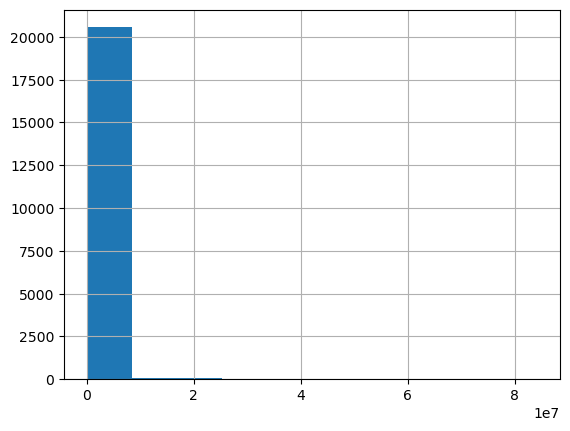

In [18]:
df_filter['TOTAL_EGRESO'].hist()

## Generar un histograma de los valores de la columna 'TOTAL_EGRESO' filtrando previamente los importes que se encuentran por debajo del percentil 95.

<Axes: >

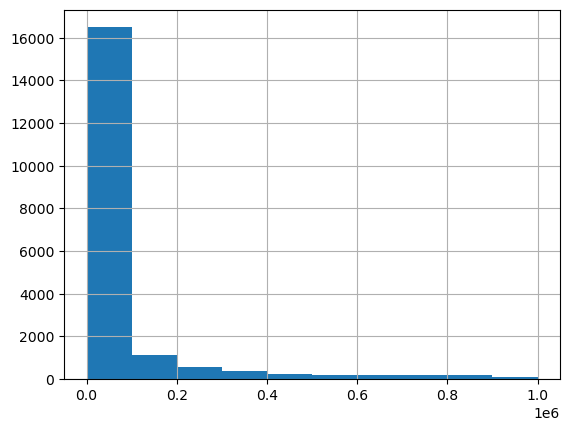

In [20]:
# se desprecia el 5% de los valores mas altos
df_filter[df_filter['TOTAL_EGRESO']<df_filter['TOTAL_EGRESO'].quantile(0.95)]['TOTAL_EGRESO'].hist()

## Dividir el gráfico anterior en 30 intervalos.

<Axes: >

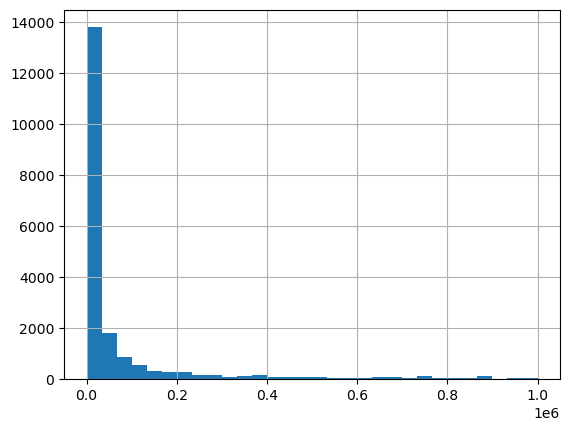

In [22]:
# se desprecia el 5% de los valores mas altos
df_filter[df_filter['TOTAL_EGRESO']<df_filter['TOTAL_EGRESO'].quantile(0.95)]['TOTAL_EGRESO'].hist(bins=30)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'CONTRATISTAS Y FDO FED'),
  Text(1, 0, 'GASTOS VARIOS'),
  Text(2, 0, 'SERV. PERS.'),
  Text(3, 0, 'SERV PROF'),
  Text(4, 0, 'COMUNICACION'),
  Text(5, 0, 'GTS REPRE.'),
  Text(6, 0, 'CONTRATISTAS Y FDOS FED')])

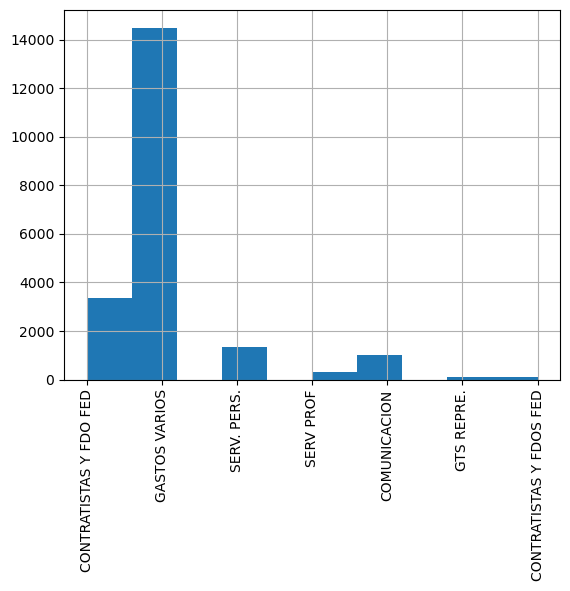

In [23]:
# Grupo de cada hoja
df_filter['Hoja'].hist()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'SECRETARIA DE FINANZAS Y TESORERIA GRAL DEL EDO DE NL'),
  Text(1, 0, 'CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION'),
  Text(2, 0, 'S.I.M.E.P.R.O.D.E.'),
  Text(3, 0, 'INTERASFALTOS, S.A. DE C.V.'),
  Text(4, 0, 'CAR ONE AMERICANA,S.A.DE C.V.'),
  Text(5, 0, 'CAR ONE MONTERREY, S.A. DE C.V.'),
  Text(6, 0, 'RAMIREZ CANTU LUZ MARIA'),
  Text(7, 0, 'LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.')])

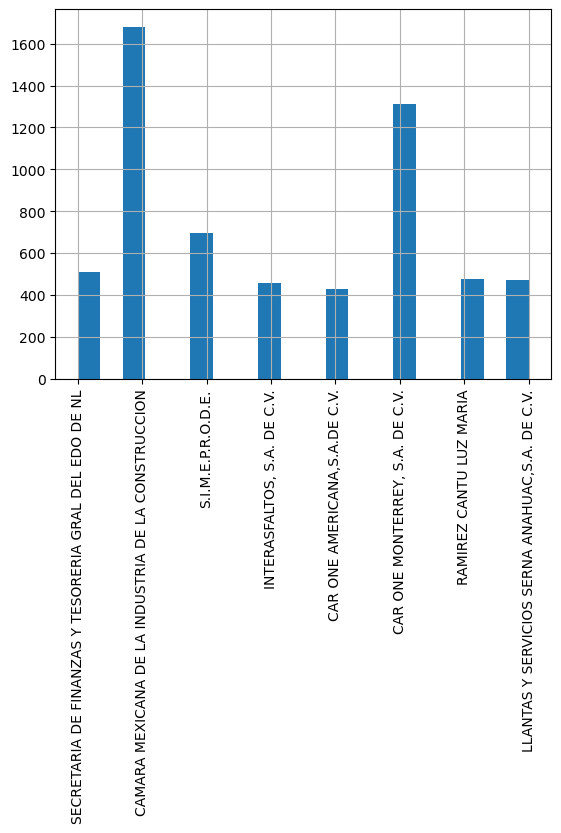

In [24]:

# histograma de los beneficiarios que tengan mas del 2% del total de pagos
df_filter_counts = df_filter['BENEFICIARIO'].value_counts()

beneficiarios_mas_de_20 = df_filter[df_filter['BENEFICIARIO'].isin(df_filter_counts[df_filter_counts >  df_filter['BENEFICIARIO'].count()*0.02].index)]

beneficiarios_mas_de_20['BENEFICIARIO'].hist(bins=20)

plt.xticks(rotation=90)

# Analisis Multidimensional

## Identificar los proveedores o beneficiarios con mayor carga económica.

In [27]:
sum_importe_bene=df_filter.groupby('BENEFICIARIO').sum()['TOTAL_EGRESO']
sum_importe_bene

BENEFICIARIO
3G CONSULTING Y ASESORIA, S.A. DE C.V.                 6164253.38
7-ELEVEN MEXICO, SA. DE CV.                               3840.30
ABC Y CONSTRUCCIONES, SA. DE CV.                      14085942.81
ABUNDIS  ALBERTO                                        524970.00
ACADEMIA REGIONAL DE SEGURIDAD PUBLICA DEL NORESTE       55000.00
                                                         ...     
ZAVALA RODRIGUEZ YENY                                     1100.00
ZENON MORALES CRISTIAN JONATHAN                          18747.99
ZULU INFRAESTRUCTURA, S.A. DE C.V.                     7998892.84
ZUÑIGA AGUILAR JORGE ALBERTO                              8000.00
ZUÑIGA VAZQUEZ DALIA MARISOL                            170100.00
Name: TOTAL_EGRESO, Length: 1957, dtype: float64

C:\Users\ba010006b6\AppData\Local\Temp\ipykernel_243152\2016588184.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


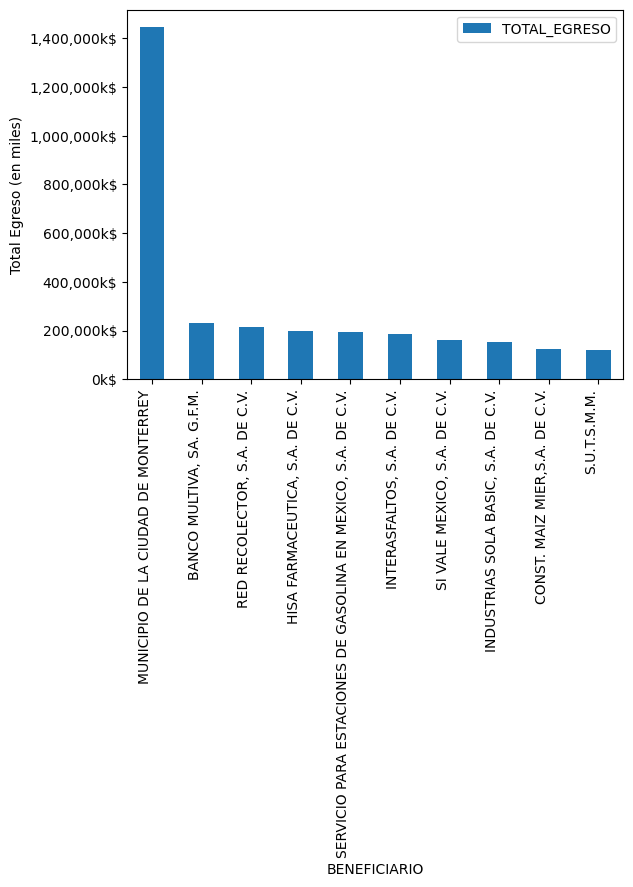

In [28]:


# Supongamos que 'sum_importe_bene' es el DataFrame que estás usando
# Primero reseteamos el índice, ordenamos y seleccionamos las primeras 10 filas
top_10 = sum_importe_bene.reset_index().sort_values(by='TOTAL_EGRESO', ascending=False).iloc[0:10]

# Crear la gráfica de barras
ax = top_10.plot(kind='bar', x='BENEFICIARIO', y='TOTAL_EGRESO')

# Usar FuncFormatter para formatear el eje Y en miles (k)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}k$'.format(x*1e-3)))

# Ajustar etiquetas y mostrar gráfico
ax.set_ylabel('Total Egreso (en miles)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


## Determinar el gasto promedio por cada categoría o por hoja de Excel.

In [30]:
prom_hoja=df_filter.groupby('Hoja')['TOTAL_EGRESO'].mean()
prom_hoja

Hoja
COMUNICACION                82649.401064
CONTRATISTAS Y FDO FED     395824.044859
CONTRATISTAS Y FDOS FED    571318.942427
GASTOS VARIOS              315605.045512
GTS REPRE.                  12404.581628
SERV PROF                  230981.720252
SERV. PERS.                 43171.850244
Name: TOTAL_EGRESO, dtype: float64

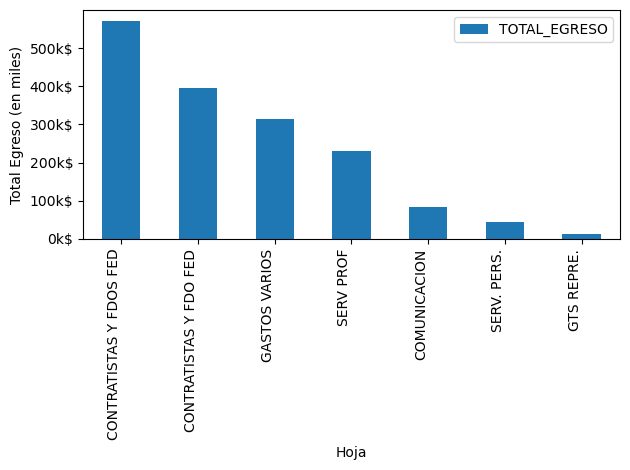

In [31]:

# Supongamos que 'sum_importe_bene' es el DataFrame que estás usando
# Primero reseteamos el índice, ordenamos y seleccionamos las primeras 10 filas
hoja= prom_hoja.reset_index().sort_values(by='TOTAL_EGRESO', ascending=False)

# Crear la gráfica de barras
ax = hoja.plot(kind='bar', x='Hoja', y='TOTAL_EGRESO')

# Usar FuncFormatter para formatear el eje Y en miles (k)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}k$'.format(x*1e-3)))

# Ajustar etiquetas y mostrar gráfico
ax.set_ylabel('Total Egreso (en miles)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


## Determinar los gastos por fecha.

In [33]:
sum_importe_fecha=df_filter.groupby('Mes').sum()['TOTAL_EGRESO']
sum_importe_fecha

Mes
ABRIL         3.764078e+08
AGOSTO        5.243227e+08
DICIEMBRE     1.337525e+09
ENERO         1.827498e+08
FEBRERO       3.329322e+08
JULIO         4.517497e+08
JUNIO         4.161572e+08
MARZO         5.837280e+08
MAYO          4.508810e+08
NOVIEMBRE     6.014681e+08
OCTUBRE       4.880690e+08
SEPTIEMBRE    4.259668e+08
Name: TOTAL_EGRESO, dtype: float64

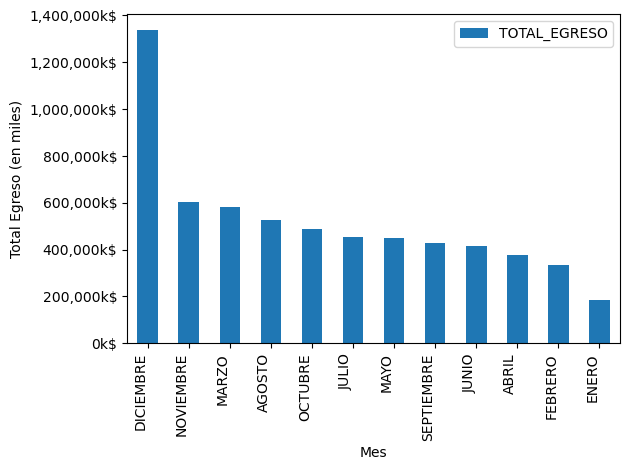

In [34]:

# Supongamos que 'sum_importe_bene' es el DataFrame que estás usando
# Primero reseteamos el índice, ordenamos y seleccionamos las primeras 10 filas
hoja= sum_importe_fecha.reset_index().sort_values(by='TOTAL_EGRESO', ascending=False)

# Crear la gráfica de barras
ax = hoja.plot(kind='bar', x='Mes', y='TOTAL_EGRESO')

# Usar FuncFormatter para formatear el eje Y en miles (k)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}k$'.format(x*1e-3)))

# Ajustar etiquetas y mostrar gráfico
ax.set_ylabel('Total Egreso (en miles)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


## Realizar dos análisis multidimensionales adicionales.

In [36]:
df_filter

,BENEFICIARIO,FACT-NUE-FO,CONTRATO,CONCEPTO,TIPO_OP,FECHA,TOTAL_EGRESO,Hoja,Mes
0,TESORERIA DE LA FEDERACION,155002-1,NO APLICA,REINTEGRO DE PRODUCTOS FINANCIEROS DEL PROGRAM...,TR,2019-01-23,22455.00,CONTRATISTAS Y FDO FED,ENERO
1,TESORERIA DE LA FEDERACION,155002-2,NO APLICA,REINTEGRO DE IMPORTE NO COMPROMETIDO AL 31 DE ...,TR,2019-01-23,22000000.00,CONTRATISTAS Y FDO FED,ENERO
2,TESORERIA DE LA FEDERACION,158002-2,NO APLICA,REINTEGRO VIA PEC DE RENDIMIENTOS Y PRODUCTOS ...,TR,2019-01-25,57957.14,CONTRATISTAS Y FDO FED,ENERO
3,TESORERIA DE LA FEDERACION,158002-1,NO APLICA,REINTEGRO DE RECURSOS NO DEVENGADOS DEL PROGRA...,TR,2019-01-25,66692.24,CONTRATISTAS Y FDO FED,ENERO
4,"TELEFONOS DE MEXICO,S.A.B DE C.V.",0F0359812-158003-13,NO APLICA,CONSUMO DE TELEFONO DEL DIF CANOAS Y SEGURIDAD...,CH,2019-01-24,3048.07,GASTOS VARIOS,ENERO
...,...,...,...,...,...,...,...,...,...
20697,TAMEZ VALLE SERGIO DAVID,347-158004-1869,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. R...,CH,2019-12-17,89042.85,SERV. PERS.,DICIEMBRE
20698,VALLEJO NORIEGA JOSEFA TERESA,1466-158004-1882,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. RE...,CH,2019-12-17,86650.55,SERV. PERS.,DICIEMBRE
20699,VALLEJO NORIEGA MARIA SUSANA,1466-158004-1881,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. RE...,CH,2019-12-17,86650.55,SERV. PERS.,DICIEMBRE
20700,VARELA MONSIVAIS ANTONIA,7947-158004-1867,NO APLICA,PAGO DE SEGURO DE VIDA POR DEFUNCION DEL C. MA...,CH,2019-12-17,176451.54,SERV. PERS.,DICIEMBRE


In [124]:
# Categoria con mayor gasto
hoja=df_filter.groupby('Hoja').sum()['TOTAL_EGRESO']
hoja


Hoja
COMUNICACION               8.314530e+07
CONTRATISTAS Y FDO FED     1.322844e+09
CONTRATISTAS Y FDOS FED    5.884585e+07
GASTOS VARIOS              4.574380e+09
GTS REPRE.                 1.066794e+06
SERV PROF                  7.322121e+07
SERV. PERS.                5.845469e+07
Name: TOTAL_EGRESO, dtype: float64

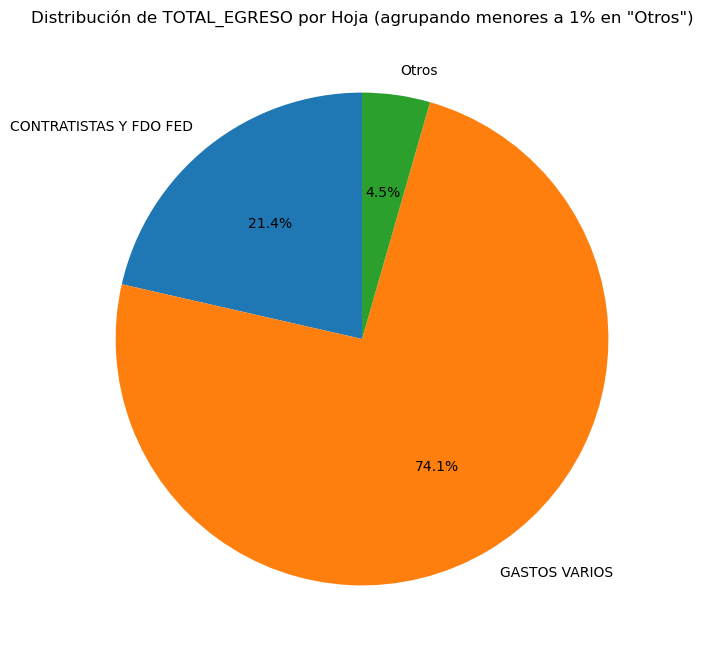

In [130]:
# Función para agrupar categorías menores a un umbral en 'Otros'
def agrupar_menores(df, threshold=0.01):
    total = df.sum()
    df_porcentaje = df / total
    df_filtrado = df[df_porcentaje >= threshold]
    otros = df[df_porcentaje < threshold].sum()
    if otros > 0:
        df_filtrado['Otros'] = otros
    return df_filtrado

# Agrupar categorías menores a 1%
df_agrupado = agrupar_menores(hoja, threshold=0.05)

# Creación del diagrama de pie con la categoría 'Otros'
plt.figure(figsize=(8, 8))
plt.pie(df_agrupado, labels=df_agrupado.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de TOTAL_EGRESO por Hoja (agrupando menores a 1% en "Otros")')
plt.show()


In [39]:
# Top 10 de contratos con mayor pago
sum_contra=df_filter.groupby(['CONTRATO','BENEFICIARIO']).sum()['TOTAL_EGRESO']
sum_contra

CONTRATO         BENEFICIARIO                                      
0EP-133-2019     GAS NATURAL MEXICO,S.A.DE C.V.                             347.00
                 NATURGY MEXICO, S.A. DE C.V.                               347.00
0P-R33-04/16-CP  CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION       15041.07
0P-R33-20/16-IR  CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION          92.58
190514.01        LIZALDE CORTES JORGE ENRIQUE                              1670.40
                                                                          ...     
TES-202-2019     FACTIBILIDAD URBANA TOTAL, S.A. DE C.V.                 290000.00
TES-203-2019     MARTINEZ MAGALLANES CONSULTORES, S.C.                   214600.00
TES-204-2019     SALINAS GARZA GERARDO                                 13107173.59
o.t. 2019090008  MRKT 07, S.A. DE C.V.                                     1972.00
o.t.20184108     RAMIREZ PEÑA ALEJANDRO                                    4520.52
Name: TOTAL_EGRESO,

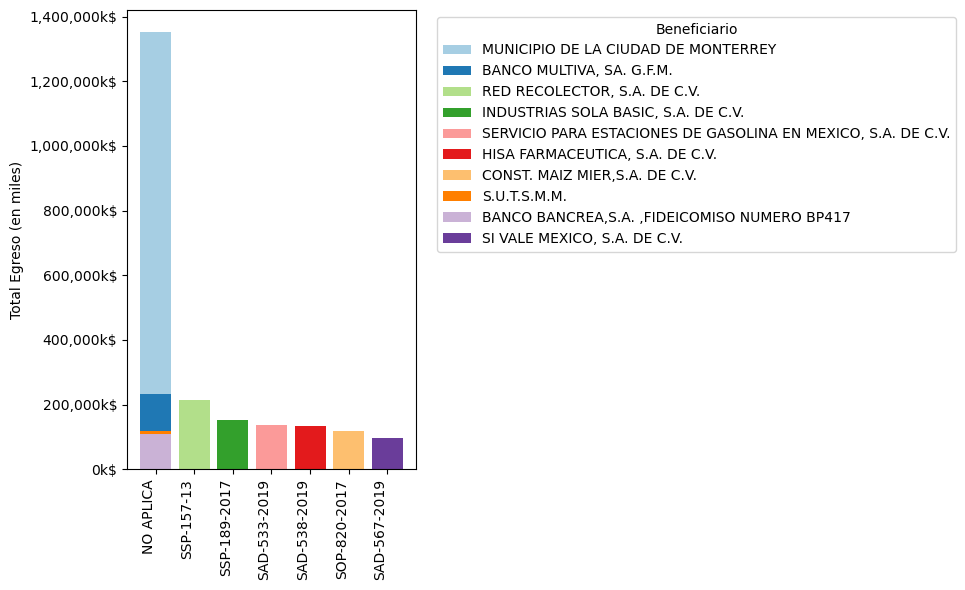

In [40]:
# Primero reseteamos el índice, ordenamos y seleccionamos las primeras 10 filas
top_10 = sum_contra.reset_index().sort_values(by='TOTAL_EGRESO', ascending=False).iloc[0:10]

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Asignar colores únicos a cada barra según el beneficiario
colors = plt.cm.Paired(range(len(top_10)))

# Graficamos los datos con colores para cada beneficiario
bars = ax.bar(top_10['CONTRATO'], top_10['TOTAL_EGRESO'], color=colors)

# Usar FuncFormatter para formatear el eje Y en miles (k)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}k$'.format(x*1e-3)))

# Añadir la leyenda con los nombres de los beneficiarios
ax.legend(bars, top_10['BENEFICIARIO'], title="Beneficiario", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar etiquetas y mostrar gráfico
ax.set_ylabel('Total Egreso (en miles)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## Análisis de texto

In [68]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
#nltk.download()

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ba010006b6\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [88]:
texto_compras=''

In [52]:
#df_diciembre = df_filter[(df_filter['Mes'] == 'DICIEMBRE')]

In [90]:
for row in df_filter['CONCEPTO']:
    texto_compras=texto_compras+' '+ row

In [92]:
stop_word_list=stopwords.words('spanish')+['2023','cont','millar','dpp','diciembre','municipio','monterrey']

In [94]:
texto_compras=' '.join([x for x in texto_compras.strip().lower().split(' ') if x not in stop_word_list and len(x)>4])

In [96]:
wc=WordCloud(background_color='white')
wc.generate(texto_compras)

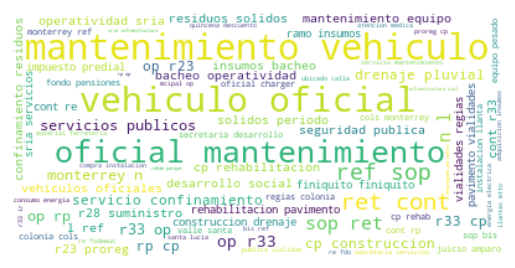

In [98]:
plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
plt.show()